<아이디어>

신종 코로나바이러스 감염증(코로나19) 발생 전, 후로 소비에 어떤 변화가 있었을지 다방면으로 살펴보고자 함. 크게 두 시기로 나누었음.
 1. 코로나19 발생 전 : 2019년 12월, 2020년 1월 (2개월)<br>
    코로나19 발생 후 : 2020년 12월, 2021년 1월

 2. 코로나19 발생 직후(단기) : 2020년 2월 ~ 5월 (4개월)<br>
    코로나19 발생 1년여 후(장기) : 2021년 2월 ~ 5월

In [1]:
# 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import pandas as pd
import numpy as np


# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일을 이용하겠다.
plt.rc('font', family='NanumBarunGothic') 
plt.style.use('seaborn-deep')
# sns.set(font_scale=1.3)

## 데이터 소개

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/광데파_공유폴더/코로나 전후 1인가구 업종별 소비 데이터.zip', encoding='cp949')
# data = pd.read_csv(r'/content/drive/MyDrive/DATA_SSC_ONEPER_F.csv', encoding='euc-kr')

* data : 254,394 rows, 75 columns

In [5]:
data.shape

(254394, 75)

In [6]:
# 컬럼의 자료형 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254394 entries, 0 to 254393
Data columns (total 75 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   소비년월           254394 non-null  int64 
 1   고객거주지역         254394 non-null  object
 2   연령성별           254394 non-null  object
 3   직업             254394 non-null  object
 4   추정소득           254394 non-null  object
 5   일인가구여부         254394 non-null  object
 6   고객수            254394 non-null  int64 
 7   CNT            254394 non-null  int64 
 8   CNT_DAY_월      254394 non-null  int64 
 9   CNT_DAY_화      254394 non-null  int64 
 10  CNT_DAY_수      254394 non-null  int64 
 11  CNT_DAY_목      254394 non-null  int64 
 12  CNT_DAY_금      254394 non-null  int64 
 13  CNT_DAY_토      254394 non-null  int64 
 14  CNT_DAY_일      254394 non-null  int64 
 15  CNT_DAY_평일     254394 non-null  int64 
 16  CNT_DAY_주말공휴일  254394 non-null  int64 
 17  CNT_TIME_A     254394 non-null  int64 
 18  CNT_

In [7]:
data.describe()

,소비년월,고객수,CNT,CNT_DAY_월,CNT_DAY_화,CNT_DAY_수,CNT_DAY_목,CNT_DAY_금,CNT_DAY_토,CNT_DAY_일,CNT_DAY_평일,CNT_DAY_주말공휴일,CNT_TIME_A,CNT_TIME_B,CNT_TIME_C,CNT_TIME_D,CNT_TIME_E,CNT_TIME_F,CNT_TIME_G,CNT_TIME_H,CNT_TIME_I,CNT_TIME_J,CNT_가례,CNT_가전,CNT_건강보조,CNT_골프장,CNT_공과금,CNT_관람,CNT_교육기타,CNT_교통,CNT_놀이공원,CNT_대중교통,CNT_동물병원,CNT_마트할인점,CNT_면세점,CNT_문구사무용품,CNT_배달앱,CNT_백화점,CNT_병원,CNT_보험,CNT_뷰티,CNT_상품권,CNT_서적,CNT_쇼핑기타,CNT_숙박,CNT_스포츠시설,CNT_스포츠의류용품,CNT_아울렛,CNT_여행상품,CNT_온라인쇼핑,CNT_유아교육,CNT_유흥,CNT_음식점,CNT_의류,CNT_인테리어,CNT_정기결제,CNT_제과점,CNT_주류판매점,CNT_주생활관리,CNT_주유,CNT_주차,CNT_차량관리,CNT_차량구매,CNT_취미,CNT_커피음료,CNT_패션잡화,CNT_편의점,CNT_학교,CNT_학원,CNT_화장품
count,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000,254394.000000
mean,202038.941995,269.339639,2187.965530,340.999328,322.178723,312.844505,319.139021,319.408221,306.319312,266.842367,1535.822287,652.138309,312.809956,44.596751,127.973105,223.897077,299.472920,273.233689,281.649705,286.788022,214.826568,119.738170,0.193491,12.209282,53.241535,4.644980,8.964940,2.804940,1.286269,27.222887,0.721015,183.087475,2.263363,332.252832,0.626560,3.492803,66.284629,23.340692,60.864667,40.790565,10.136324,0.022056,6.323710,1.053869,4.000362,1.595348,3.183562,17.766488,0.121658,391.998243,0.140569,2.715182,278.303738,8.838652,12.092962,79.340609,39.482566,0.049533,9.037414,80.387167,7.388842,5.930226,0.047611,17.467381,81.510743,2.990719,229.529026,0.038334,3.154732,8.767149
std,59.957571,468.637285,3971.183098,613.558706,588.681599,566.232155,580.871795,582.681177,570.237000,506.268843,2770.800811,1225.717973,623.138909,88.702691,235.702383,382.223855,535.644779,479.505604,500.726667,539.509523,424.025882,252.072032,1.752833,27.158651,94.374883,15.674994,24.621141,13.993333,6.237520,57.705063,4.595208,440.126820,8.240585,589.967072,4.958299,11.840720,183.452296,77.369997,107.762140,76.255440,24.870699,0.585429,20.794144,5.695924,12.569124,6.901032,10.068923,53.509348,1.998795,791.201352,2.193220,11.246386,518.712668,24.729694,25.118943,139.731105,84.066716,0.939785,21.642435,154.901197,20.961196,17.014845,0.812186,56.399946,191.048006,9.627100,522.346313,0.917266,14.487387,28.939795
min,201912.000000,21.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202003.000000,59.000000,444.000000,70.000000,65.000000,63.000000,64.000000,64.000000,59.000000,50.000000,315.000000,124.000000,55.000000,0.000000,25.000000,49.000000,63.000000,58.000000,59.000000,54.000000,35.000000,16.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0

* 결측치 확인 -> 결측치는 없음.
* 10건 미만은 이미 레코드 삭제 또는 0건 처리되어있음. (readme에는 10건 이하라고 되어있으나 10건까지는 카운트되어있음)

In [8]:
data.isnull().sum().sort_values(ascending=False)

CNT_화장품        0
CNT_TIME_B     0
CNT_TIME_D     0
CNT_TIME_E     0
CNT_TIME_F     0
              ..
CNT_스포츠시설      0
CNT_스포츠의류용품    0
CNT_아울렛        0
CNT_여행상품       0
소비년월           0
Length: 75, dtype: int64

In [9]:
data.head(2)

,소비년월,고객거주지역,연령성별,직업,추정소득,일인가구여부,고객수,CNT,CNT_DAY_월,CNT_DAY_화,CNT_DAY_수,CNT_DAY_목,CNT_DAY_금,CNT_DAY_토,CNT_DAY_일,CNT_DAY_평일,CNT_DAY_주말공휴일,CNT_TIME_A,CNT_TIME_B,CNT_TIME_C,CNT_TIME_D,CNT_TIME_E,CNT_TIME_F,CNT_TIME_G,CNT_TIME_H,CNT_TIME_I,CNT_TIME_J,CNT_가례,CNT_가전,CNT_건강보조,CNT_골프장,CNT_공과금,CNT_관람,CNT_교육기타,CNT_교통,CNT_놀이공원,CNT_대중교통,CNT_동물병원,CNT_마트할인점,CNT_면세점,CNT_문구사무용품,CNT_배달앱,CNT_백화점,CNT_병원,CNT_보험,CNT_뷰티,CNT_상품권,CNT_서적,CNT_쇼핑기타,CNT_숙박,CNT_스포츠시설,CNT_스포츠의류용품,CNT_아울렛,CNT_여행상품,CNT_온라인쇼핑,CNT_유아교육,CNT_유흥,CNT_음식점,CNT_의류,CNT_인테리어,CNT_정기결제,CNT_제과점,CNT_주류판매점,CNT_주생활관리,CNT_주유,CNT_주차,CNT_차량관리,CNT_차량구매,CNT_취미,CNT_커피음료,CNT_패션잡화,CNT_편의점,CNT_학교,CNT_학원,CNT_화장품
0,201912,경기 파주시,B,D.공무원,D,X,127,1128,200,185,129,150,151,162,151,786,342,224,16,62,130,160,124,118,131,113,50,0,0,35,0,0,0,0,0,0,168,0,191,0,0,0,0,48,21,0,0,0,0,0,0,0,0,0,131,0,0,178,0,0,36,19,0,0,45,0,0,0,0,23,0,101,0,10,0
1,201912,대전 서구,D,E.교육인,A,X,101,1128,193,188,134,158,160,169,126,789,339,130,27,57,122,159,144,152,139,125,73,0,0,34,0,0,10,0,43,0,163,0,96,0,0,38,32,52,0,0,0,0,0,0,0,0,0,0,227,0,0,117,11,0,18,38,0,0,20,0,0,0,15,58,0,72,0,0,10


In [10]:
data.columns

Index(['소비년월', '고객거주지역', '연령성별', '직업', '추정소득', '일인가구여부', '고객수', 'CNT',
       'CNT_DAY_월', 'CNT_DAY_화', 'CNT_DAY_수', 'CNT_DAY_목', 'CNT_DAY_금',
       'CNT_DAY_토', 'CNT_DAY_일', 'CNT_DAY_평일', 'CNT_DAY_주말공휴일', 'CNT_TIME_A',
       'CNT_TIME_B', 'CNT_TIME_C', 'CNT_TIME_D', 'CNT_TIME_E', 'CNT_TIME_F',
       'CNT_TIME_G', 'CNT_TIME_H', 'CNT_TIME_I', 'CNT_TIME_J', 'CNT_가례',
       'CNT_가전', 'CNT_건강보조', 'CNT_골프장', 'CNT_공과금', 'CNT_관람', 'CNT_교육기타',
       'CNT_교통', 'CNT_놀이공원', 'CNT_대중교통', 'CNT_동물병원', 'CNT_마트할인점', 'CNT_면세점',
       'CNT_문구사무용품', 'CNT_배달앱', 'CNT_백화점', 'CNT_병원', 'CNT_보험', 'CNT_뷰티',
       'CNT_상품권', 'CNT_서적', 'CNT_쇼핑기타', 'CNT_숙박', 'CNT_스포츠시설', 'CNT_스포츠의류용품',
       'CNT_아울렛', 'CNT_여행상품', 'CNT_온라인쇼핑', 'CNT_유아교육', 'CNT_유흥', 'CNT_음식점',
       'CNT_의류', 'CNT_인테리어', 'CNT_정기결제', 'CNT_제과점', 'CNT_주류판매점', 'CNT_주생활관리',
       'CNT_주유', 'CNT_주차', 'CNT_차량관리', 'CNT_차량구매', 'CNT_취미', 'CNT_커피음료',
       'CNT_패션잡화', 'CNT_편의점', 'CNT_학교', 'CNT_학원', 'CNT_화장품'],
      dtype='object')

* 명목형 변수: 5 columns
  * 고객거주지역, 연령성별, 직업, 추정소득, 일인가구여부
* 소비년월
* 고객수
* 전체 건수 합계(CNT)
  * 요일별, 평일/주말 매출 건수 합계: 9 columns
  * 시간대별 매출 건수 합계: 10 columns
  * 업종별 건수 합계: 48 columns
* columns 명에서 반복되는 CNT를 뗌.

In [11]:
# columns 명 수정
data.columns = ['소비년월', '고객거주지역', '연령성별', '직업', '추정소득', '일인가구여부', '고객수', 'CNT',
       '월', '화', '수', '목', '금',
       '토', '일', '평일', '주말공휴일', 'TIME_A',
       'TIME_B', 'TIME_C', 'TIME_D', 'TIME_E', 'TIME_F',
       'TIME_G', 'TIME_H', 'TIME_I', 'TIME_J', '가례',
       '가전', '건강보조', '골프장', '공과금', '관람', '교육기타',
       '교통', '놀이공원', '대중교통', '동물병원', '마트할인점', '면세점',
       '문구사무용품', '배달앱', '백화점', '병원', '보험', '뷰티',
       '상품권', '서적', '쇼핑기타', '숙박', '스포츠시설', '스포츠의류용품',
       '아울렛', '여행상품', '온라인쇼핑', '유아교육', '유흥', '음식점',
       '의류', '인테리어', '정기결제', '제과점', '주류판매점', '주생활관리',
       '주유', '주차', '차량관리', '차량구매', '취미', '커피음료',
       '패션잡화', '편의점', '학교', '학원', '화장품']

In [12]:
data.columns

Index(['소비년월', '고객거주지역', '연령성별', '직업', '추정소득', '일인가구여부', '고객수', 'CNT', '월',
       '화', '수', '목', '금', '토', '일', '평일', '주말공휴일', 'TIME_A', 'TIME_B',
       'TIME_C', 'TIME_D', 'TIME_E', 'TIME_F', 'TIME_G', 'TIME_H', 'TIME_I',
       'TIME_J', '가례', '가전', '건강보조', '골프장', '공과금', '관람', '교육기타', '교통', '놀이공원',
       '대중교통', '동물병원', '마트할인점', '면세점', '문구사무용품', '배달앱', '백화점', '병원', '보험',
       '뷰티', '상품권', '서적', '쇼핑기타', '숙박', '스포츠시설', '스포츠의류용품', '아울렛', '여행상품',
       '온라인쇼핑', '유아교육', '유흥', '음식점', '의류', '인테리어', '정기결제', '제과점', '주류판매점',
       '주생활관리', '주유', '주차', '차량관리', '차량구매', '취미', '커피음료', '패션잡화', '편의점', '학교',
       '학원', '화장품'],
      dtype='object')

## 데이터 전처리

### 1) '소비년월' 열을 year, month 열로 분할

* 소비년월 : 2019년 12월 ~ 2020년 5월, 2020년 12월 ~ 2021년 5월.
* 우리나라는 2020년 초에 코로나19 유행이 본격화되었기 때문에 전년동월과 비교해서 어떤 변화가 있는지 살펴보기 위해 연, 월로 나누어 새로운 컬럼을 생성.

In [13]:
data['소비년월']= data['소비년월'].astype('str')

# 소비년월 -> 년, 월 나눈 새로운 컬럼 생성
data["month"]=data["소비년월"].str[4:6]
data["year"]=data["소비년월"].str[:4]

del data['소비년월']

### 2) '고객거주지역' 열에서 앞 2글자만 추출

* 기존 254개(시군구까지 세분화) -> 17개(시도까지)의 고유값을 가짐.
* 보다 직관적인 비교를 위해 앞 두 글자(예. 서울)만 추출해서 '고객거주시도' 컬럼을 만들어서 '고객거주지역'을 대체함. 


In [14]:
data["고객거주시도"]=data["고객거주지역"].str[:2]
del data['고객거주지역']
data.head()

,연령성별,직업,추정소득,일인가구여부,고객수,CNT,월,화,수,목,금,토,일,평일,주말공휴일,TIME_A,TIME_B,TIME_C,TIME_D,TIME_E,TIME_F,TIME_G,TIME_H,TIME_I,TIME_J,가례,가전,건강보조,골프장,공과금,관람,교육기타,교통,놀이공원,대중교통,동물병원,마트할인점,면세점,문구사무용품,배달앱,백화점,병원,보험,뷰티,상품권,서적,쇼핑기타,숙박,스포츠시설,스포츠의류용품,아울렛,여행상품,온라인쇼핑,유아교육,유흥,음식점,의류,인테리어,정기결제,제과점,주류판매점,주생활관리,주유,주차,차량관리,차량구매,취미,커피음료,패션잡화,편의점,학교,학원,화장품,month,year,고객거주시도
0,B,D.공무원,D,X,127,1128,200,185,129,150,151,162,151,786,342,224,16,62,130,160,124,118,131,113,50,0,0,35,0,0,0,0,0,0,168,0,191,0,0,0,0,48,21,0,0,0,0,0,0,0,0,0,131,0,0,178,0,0,36,19,0,0,45,0,0,0,0,23,0,101,0,10,0,12,2019,경기
1,D,E.교육인,A,X,101,1128,193,188,134,158,160,169,126,789,339,130,27,57,122,159,144,152,139,125,73,0,0,34,0,0,10,0,43,0,163,0,96,0,0,38,32,52,0,0,0,0,0,0,0,0,0,0,227,0,0,117,11,0,18,38,0,0,20,0,0,0,15,58,0,72,0,0,10,12,2019,대전
2,B,D.공무원,C,X,94,1129,200,210,118,162,149,134,156,811,318,323,10,71,81,150,127,150,118,72,27,0,0,32,0,0,0,0,10,0,284,0,144,0,0,0,0,40,16,0,0,0,0,0,0,0,25,0,67,0,0,167,0,0,20,24,0,0,54,0,0,0,11,44,0,96,0,0,0,12,2019,경기
3,E,F.자영업자,B,X,165,1129,180,174,153,145,160,151,166,788,341,152,13,50,111,173,193,159,110,109,59,0,14,28,0,0,0,0,27,0,42,0,237,0,0,0,0,30,26,0,0,0,0,0,0,0,10,0,189,0,0,117,26,0,86,22,0,0,71,0,0,0,10,32,14,52,0,0,11,12,2019,경남
4,A,D.공무원,B,X,90,1131,180,196,162,137,148,146,162,787,344,117,15,71,133,180,130,119,142,142,82,0,0,28,0,0,0,0,12,0,76,0,135,0,0,27,11,40,10,0,0,0,0,0,0,0,0,0,173,0,0,219,0,16,30,21,0,0,37,0,0,0,17,57,0,163,0,0,0,12,2019,광주


In [15]:
# 코로나 전후 비교를 위해 데이터 copy 
detail_data = data.copy()

### 3) 비슷한 업종끼리 묶기

* 각 업종별 매출 건수 단순 합계를 오름차순으로 정리한 결과
  * 온라인쇼핑 > 마트할인점 > 음식점 > 편의점 > ... > 학교 > 상품권 순으로 나타남. 
  * 세부 업종 중 단순 매출 건수 합계는 온라인쇼핑 건수가 가장 많음.

In [16]:
# 총 9개의 범주로 묶음(애매한 건 기타로 넣었는데, 피드백 주세요.)
# 여가생활
data['여가생활'] = data['골프장'] + data['관람'] + data['놀이공원'] + data['스포츠시설'] + data['여행상품'] + data['유흥'] + data['취미']

# 소비(외부)
data['소비(외부)'] = data['마트할인점'] + data['편의점']

# 소비(내부)
data['소비(내부)'] = data['온라인쇼핑'] + data['배달앱']

# 패션 및 뷰티
data['패션 및 뷰티'] = data['면세점'] + data['백화점'] + data['쇼핑기타'] + data['스포츠의류용품'] + data['아울렛'] + data['패션잡화'] + data['화장품'] + data['뷰티'] + data['의류']

# 건강
data['건강']= data['건강보조'] + data['병원'] + data['보험']

# 식품
data['식품'] = data['커피음료'] + data['음식점'] + data['제과점'] + data['주류판매점']

# 교육
data['교육'] = data['교육기타'] + data['학교'] + data['학원'] + data['유아교육']

# 교통업
data['교통업'] = data['주유'] + data['주차'] + data['차량관리'] + data['차량구매'] + data['교통'] +  data['대중교통']

# 기타
data['기타'] = data['가례'] + data['공과금'] + data['인테리어'] + data['정기결제'] + data['상품권'] + data['서적'] + data['가전'] + data['주생활관리'] + data['숙박'] + data['문구사무용품'] + data['동물병원']

In [17]:
# 기존 업종 열 삭제
data = data.drop(['가례', '가전', '건강보조', '골프장', '공과금', '관람', '교육기타', '교통', '놀이공원',
       '대중교통', '동물병원', '마트할인점', '면세점', '문구사무용품', '배달앱', '백화점', '병원', '보험',
       '뷰티', '상품권', '서적', '쇼핑기타', '숙박', '스포츠시설', '스포츠의류용품', '아울렛', '여행상품',
       '온라인쇼핑', '유아교육', '유흥', '음식점', '의류', '인테리어', '정기결제', '제과점', '주류판매점',
       '주생활관리', '주유', '주차', '차량관리', '차량구매', '취미', '커피음료', '패션잡화', '편의점', '학교',
       '학원', '화장품'], axis=1)

In [18]:
# 확인
data.columns

Index(['연령성별', '직업', '추정소득', '일인가구여부', '고객수', 'CNT', '월', '화', '수', '목', '금',
       '토', '일', '평일', '주말공휴일', 'TIME_A', 'TIME_B', 'TIME_C', 'TIME_D',
       'TIME_E', 'TIME_F', 'TIME_G', 'TIME_H', 'TIME_I', 'TIME_J', 'month',
       'year', '고객거주시도', '여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품',
       '교육', '교통업', '기타'],
      dtype='object')

In [19]:
# 업종 총합계 구하기
# 10건 이하 데이터를 0으로 처리했기 때문에 업종 거래수 합계와 CNT 가 약 100건수 차이가 존재
# -> 이후 업종 별 거래비율을 구하기 위해 '업종 거래수 합계 열'을 추가해준다

data['업종_거래수_총합'] = data['여가생활'] + data['소비(외부)'] + data['소비(내부)']+ data['패션 및 뷰티']+ data['건강']+ data['식품'] + data['교육'] + data['교통업'] + data['기타']
data.head(2)

,연령성별,직업,추정소득,일인가구여부,고객수,CNT,월,화,수,목,금,토,일,평일,주말공휴일,TIME_A,TIME_B,TIME_C,TIME_D,TIME_E,TIME_F,TIME_G,TIME_H,TIME_I,TIME_J,month,year,고객거주시도,여가생활,소비(외부),소비(내부),패션 및 뷰티,건강,식품,교육,교통업,기타,업종_거래수_총합
0,B,D.공무원,D,X,127,1128,200,185,129,150,151,162,151,786,342,224,16,62,130,160,124,118,131,113,50,12,2019,경기,0,292,131,0,104,220,10,213,36,1006
1,D,E.교육인,A,X,101,1128,193,188,134,158,160,169,126,789,339,130,27,57,122,159,144,152,139,125,73,12,2019,대전,25,168,265,53,86,213,0,226,18,1054


## 2. 데이터 분석 및 시각화

* 반복되는 시각화 코드를 함수화
* 파이차트, 막대그래프, 누적막대그래프 사용

### 함수

In [20]:
# 파이 차트
def pie_chart(data1, data2, title, ncol=3):
  f, ax = plt.subplots(1, 2, figsize=(15, 15))
  labels = data1.columns
  colors = sns.color_palette('hls',len(labels))

  # 고객비율
  data1.T.plot.pie(labels=data1.T.index, autopct='%.0f%%', ax=ax[0], colors=colors, subplots=True, fontsize=15) # colors=colors,
  ax[0].set_title( title +' 고객비율', position=(0.5, 0.5+0.42), fontsize=20)
  ax[0].set_ylabel('') 
  ax[0].legend(loc=(0.0, 1.0), ncol=ncol, fontsize=10)

  # 거래비율
  data2.T.plot.pie(labels=data2.T.index, autopct='%.0f%%', ax=ax[1], colors=colors, subplots=True, fontsize=15) # colors=colors,
  ax[1].set_title( title +' 거래비율', position=(0.5, 0.5+0.42), fontsize=20)
  ax[1].set_ylabel('')
  ax[1].legend(loc=(0.0, 1.0), ncol=ncol, fontsize=10)

  plt.show()


# 막대그래프
def bar_graph(data, title, xlabel, ylabel):
  
  data.plot(kind='bar',figsize=(10, 6))
  plt.title(title, fontsize=18)
  plt.xlabel(xlabel, fontsize=15)
  plt.ylabel(ylabel, fontsize=15)
  plt.xticks(rotation=45, fontsize=12)
  plt.yticks(fontsize=12)
  plt.axhline(y=0, xmin=0.0, xmax=1.0, color='black')

  plt.show()

# 누적막대그래프
def barh_graph(data, title, xlabel, ylabel):

  data.plot(kind='barh', stacked=True, figsize=(10, 8))
  plt.title(title , fontsize=25)
  plt.xlabel(xlabel, fontsize=15)
  plt.ylabel(ylabel, fontsize=15)
  plt.xticks(rotation=45, fontsize=12)
  plt.yticks(fontsize=12)
  plt.legend(loc='best', ncol=5, fontsize=12)

  plt.show()

# 증감률 계산
def reduction_ratio(before, after):
  result = -(before - after) / before * 100
  result = result.sort_values(ascending=False)
  return result

### 1) 전체적으로 분석

* 고객거주시도별 고객수 : 경기 > 서울 > 부산 > 경남 > 인천 > ...> 세종 순
* 고객거주시도별 거래수 : 경기 > 서울 > 부산 > 인천 > 대구 > ...> 세종 순
* 경남, 전남 등은 고객수보다 거래수 순위가 낮지만, 대체로 고객수 순서와 비슷함.
* 고객수가 많은 경기, 서울(약 48%)이 거래수도 전체의 과반(약54%)을 차지함. 반대로 제주, 세종은 고객수도 적고, 거래수도 적음.     
=> 결론: 거래수는 고객수에 비례한다고 볼 수 있음.

In [21]:
# 고객거주시 별 고객수
고객수 = data[["고객거주시도", '고객수']].groupby(['고객거주시도']).sum().sort_values(by='고객수', ascending = False).T
고객수

고객거주시도,경기,서울,부산,경남,인천,대구,경북,충남,대전,광주,전북,충북,전남,강원,울산,제주,세종
고객수,18915249,13978034,4759243,4059354,3780634,3733151,2923044,2718847,2375079,1881099,1874852,1779361,1533392,1529292,1520971,704755,452031


In [22]:
# 고객거주시 별 거래수
거래수 = data[["고객거주시도", 'CNT']].groupby(['고객거주시도']).sum().sort_values(by='CNT', ascending = False).T
거래수

고객거주시도,경기,서울,부산,인천,대구,경남,충남,경북,대전,광주,충북,전북,강원,울산,전남,제주,세종
CNT,161184541,137357462,34230374,29024493,28094854,27896645,22496486,20066079,18911954,13890752,12410604,12186355,10134741,10071269,9333077,6003025,3312592


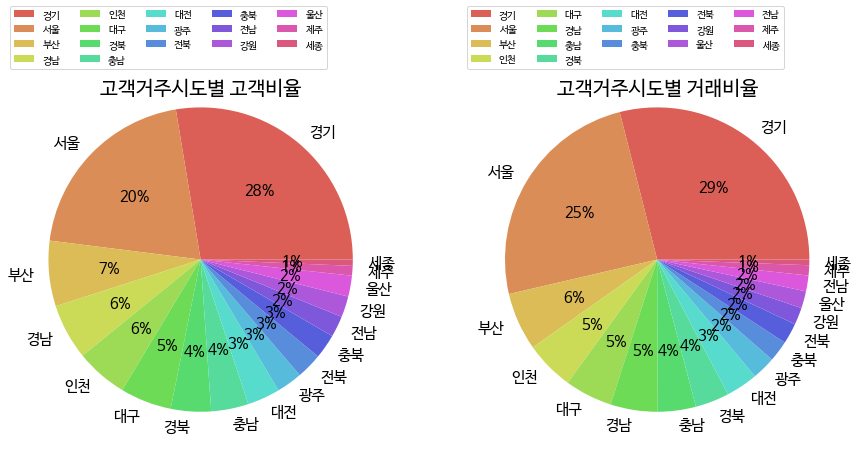

In [23]:
 # 고객거주시별 고객비율, 거래비율
 pie_chart(고객수, 거래수, '고객거주시도별', ncol=5)

* 위에서 고객수가 많은 시도가 거래수도 많았음. 1인당 거래수는 6~9건으로 큰 차이가 없음.
* 고객수, 거래서에서 상위권이었던 서울, 경기는 인당거래수에서도 1, 2위를 다투었음.
* 고객수, 거래수에서 하위권이었던 제주는 3위, 세종은 9위인 점이 인상적임. 

In [24]:
# 고객거주시별 1인당 거래수 파악
인당_거래수 = 거래수.loc['CNT'] / 고객수.loc['고객수']
인당_거래수 = 인당_거래수.sort_values(ascending=False)
인당_거래수

고객거주시도
서울    9.826665
경기    8.521407
제주    8.517889
충남    8.274274
대전    7.962663
인천    7.677150
대구    7.525775
광주    7.384381
세종    7.328241
부산    7.192399
충북    6.974753
경남    6.872188
경북    6.864789
강원    6.627080
울산    6.621605
전북    6.499902
전남    6.086556
dtype: float64

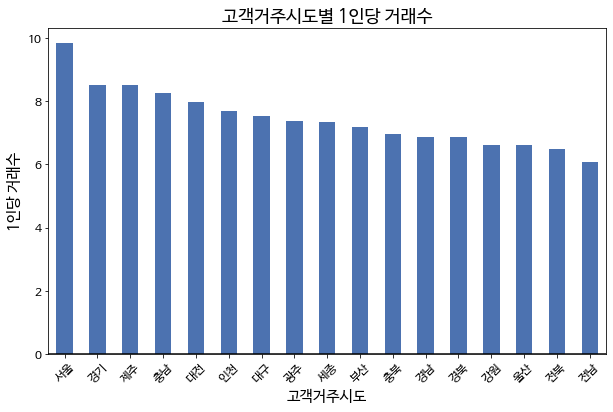

In [25]:
bar_graph(인당_거래수, '고객거주시도별 1인당 거래수', '고객거주시도', '1인당 거래수')

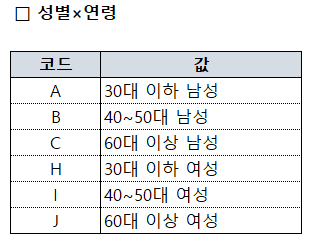

* 연령: 30대 이하, 40~50대, 60대이상으로 나눔
* 연령성별 컬럼: 연령을 셋으로 나누고, 각각 성별로 나누어 총 6개 집단을 코드화함.
* 참고: readme(데이터 정의서)에 코드 H,I,J 오타 -> 데이터에 나온대로 ABCDEF 코드로 분석 진행함.

In [26]:
# 연령성별 별 고객수
고객수 = data[['연령성별', '고객수']].groupby(['연령성별']).sum().sort_values(by='고객수', ascending = False).T
고객수

연령성별,E,B,A,D,C,F
고객수,19497152,18804664,8624584,7739133,6936596,6916259


In [27]:
# 연령성별 별 거래건수
거래수 = data[['연령성별', 'CNT']].groupby(['연령성별']).sum().sort_values(by='CNT', ascending = False).T
거래수

연령성별,B,E,A,D,C,F
CNT,145604605,143478677,119361392,90271927,30095930,27792772


* 고객수: 40 ~ 50대 여성(E) > 40 ~ 50대 남성(B) > 30대이하 남성(A) > 30대이하 여성(D) > 60대이상 남성(C) > 60대이상 여성(F)
* 거래수: 40 ~ 50대 남성(B) > 40 ~ 50대 여성(E) > 30대이하 남성(A) > 30대이하 여성(D) > 60대이상 남성(C) > 60대이상 여성(F)

* 연령성별 거래수 또한 고객수에 거의 비례함.
  * 40~50대가 전체 과반을 차지하고, 30대가 그 뒤를 따름.
  * 흥미로운 점은 고객 수는 40 ~ 50대 여성이 더 많지만 거래수는 40 ~ 50대 남성이 더 많음. 모든 연령대에서 남성 거래수가 여성 거래수보다 많지만 미미한 차이.

* 1인당 거래수는 30대(A,D)가 소비가 가장 많음, 60대(C,F)가 소비가 가장 적음.
* 결론: 매출액없이 단순 매출 건수로만 비교하기엔 무리가 있으나 사회적으로 가장 경제활동이 활발한 40 ~ 50대가 거래수가 많고, 60대이상 고객은 거래수가 가장 적음. 한편 30대이하 고객이 1인당 거래수는 가장 많았음.

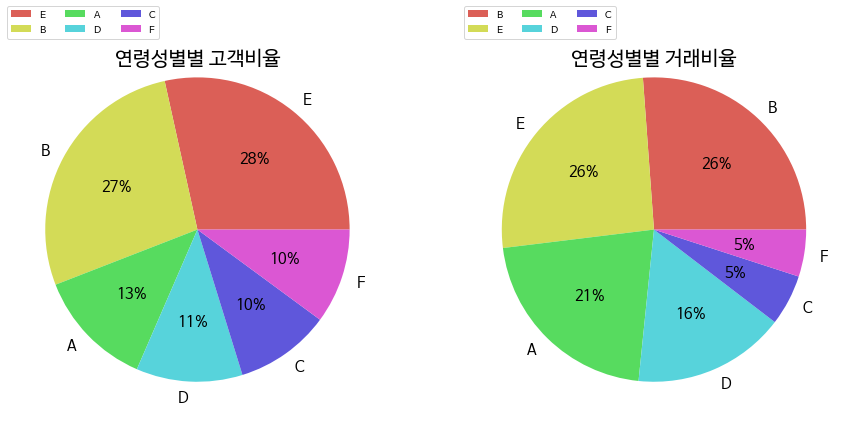

In [28]:
# 연령성별별 고객비율, 거래비율
pie_chart(고객수, 거래수, '연령성별별', ncol=3)

In [29]:
# 연령성별 별 1인당 거래수 파악하기
인당_거래수 = 거래수.loc['CNT'] / 고객수.loc['고객수']
인당_거래수 = 인당_거래수.sort_values(ascending=False)
인당_거래수

연령성별
A    13.839669
D    11.664346
B     7.743005
E     7.358956
C     4.338717
F     4.018469
dtype: float64

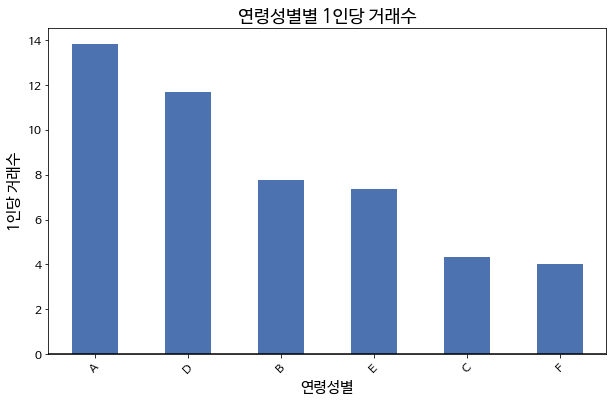

In [30]:
bar_graph(인당_거래수, '연령성별별 1인당 거래수', '연령성별', '1인당 거래수')

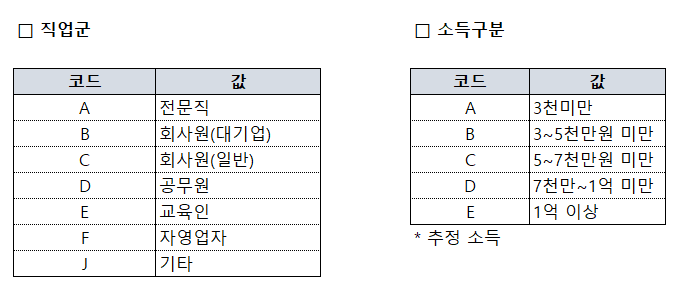

* 직업별 고객수 및 거래수
  * 직업군은 데이터 정의서 구분에 따름.
  * 고객수: C.회사원(일반) > J.기타 > F.자영업자 > B.회사원(대기업) > D.공무원 > E.교육인 > A.전문직
  * 거래수: 고객수 순서와 동일
  * 앞서 살펴 본 지역별, 연령성별별처럼 고객수가 많은 집단이 거래수도 많음.
  * 1인당 거래수에서는 순위가 뒤집힘. 절대적인 수가 적은 집단인 A.전문직, B.회사원(대기업)이 1인당 거래수가 가장 많음. C.회사원(일반)은 세번째, J.기타는 가장 하위를 차지함.
  * 연령성별에서 언급했듯 매출액이 아닌 매출 건수이므로 직접적인 소비 규모는 알 수 없으나, 소득과의 연관성이 있는지 살펴 볼 필요가 있음.

In [31]:
# 직업별 고객수, 거래건수

고객수 = data[['직업', '고객수']].groupby(['직업']).sum().sort_values(by='고객수', ascending = False).T
거래수 = data[['직업', 'CNT']].groupby(['직업']).sum().sort_values(by='CNT', ascending = False).T

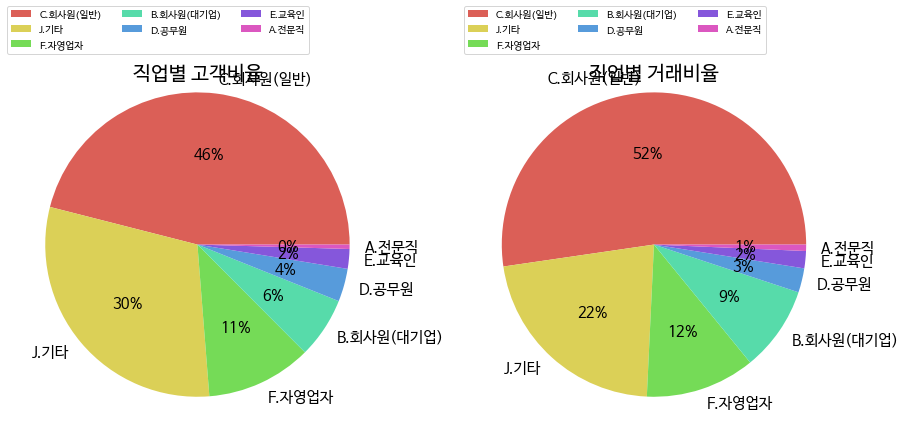

In [32]:
# 직업별 고객비율, 거래비율
pie_chart(고객수, 거래수, '직업별', ncol=3)

In [33]:
# 직업별 1인당 거래수 파악하기
인당_거래수 = 거래수.loc['CNT'] / 고객수.loc['고객수']
인당_거래수 = 인당_거래수.sort_values(ascending=False)
인당_거래수

직업
A.전문직         11.814463
B.회사원(대기업)    11.359577
C.회사원(일반)      9.232226
F.자영업자         8.417109
E.교육인          7.109078
D.공무원          5.965021
J.기타           5.898055
dtype: float64

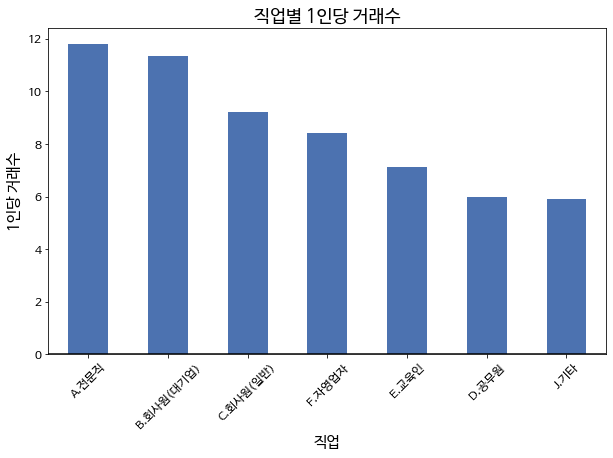

In [34]:
bar_graph(인당_거래수, '직업별 1인당 거래수', '직업', '1인당 거래수')

* 추정소득별 고객수, 거래수
  * 고객수: B.3 ~ 5천만원미만 > A.3천만원미만 > C.5 ~ 7천만원미만 > D.7천만~1억원미만 > E.1억이상
  * 거래수: 고객수와 비율이 거의 동일하게 나타남.
  * 단순 고객수, 거래수로는 소비 규모를 예측하기 어려움.
    
* 1인당 거래수 파악
  * 1인당 거래수 7~10건으로 차이가 크지 않음.
  *  E.1억이상 > C.5 ~ 7천만원미만 > D.7천만~1억원미만 > B.3 ~ 5천만원미만 > A.3천만원미만
  * 추정소득이 가장 높은 E 집단이 인당 거래수가 가장 많은 반면 추정소득이 가장 낮은 A 집단이 인당 거래수가 가장 적음. 인당 거래수는 추정소득에 비례하는 경향이 있음.

In [35]:
# 추정소득별 고객수, 거래수
고객수 = data[['추정소득', '고객수']].groupby(['추정소득']).sum().sort_values(by='고객수', ascending = False).T
거래수 = data[['추정소득', 'CNT']].groupby(['추정소득']).sum().sort_values(by='CNT', ascending = False).T

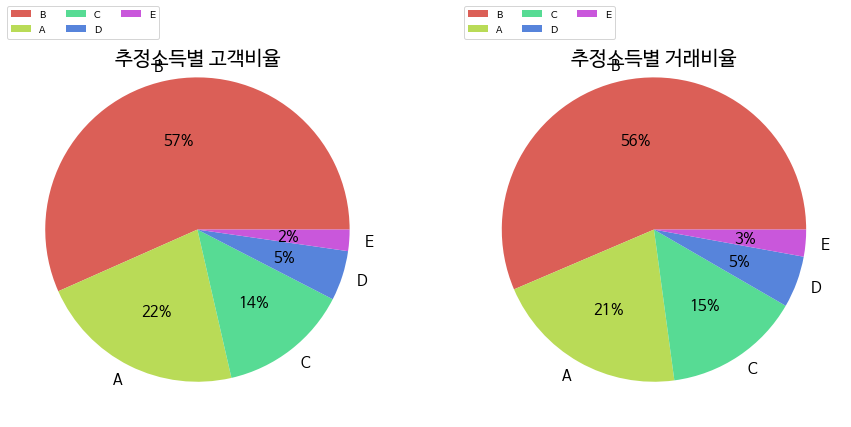

In [36]:
# 추정소득별 고객비율, 거래비율
pie_chart(고객수, 거래수, '추정소득별', ncol=3)

In [37]:
# 인당 거래수 파악하기
인당_거래수 = 거래수.loc['CNT'] / 고객수.loc['고객수']
인당_거래수 = 인당_거래수.sort_values(ascending=False)
인당_거래수

추정소득
E    10.223213
C     8.516904
D     8.422110
B     8.092483
A     7.666131
dtype: float64

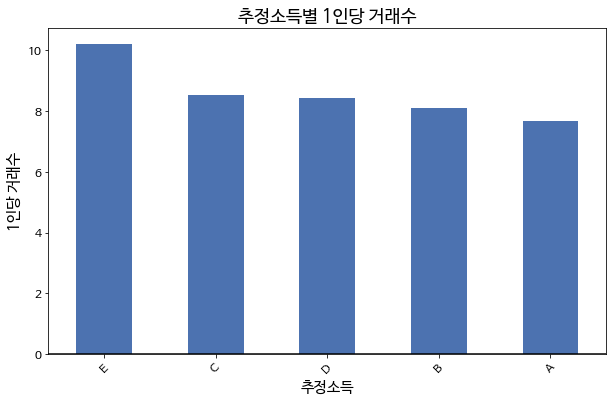

In [38]:
bar_graph(인당_거래수, '추정소득별 1인당 거래수', '추정소득', '1인당 거래수')

* 일인가구여부
  * 1인가구에 비해 2인이상 가구가 약 3배 많음. 단순 거래 건수 비교는 무의미.
  * 일인가구의 인당 거래수가 2배 정도 더 많음

In [39]:
일인가구 = data[['일인가구여부', '고객수', 'CNT']].groupby('일인가구여부').sum()
일인가구

,고객수,CNT
일인가구여부,,
O,10298681,145884936
X,58219707,410720367


In [40]:
고객수 = 일인가구['고객수']
거래수 = 일인가구['CNT']

# 1인당 거래수 파악하기
인당_거래수 = (거래수 / 고객수).sort_values(ascending=False)
인당_거래수

일인가구여부
O    14.165400
X     7.054662
dtype: float64

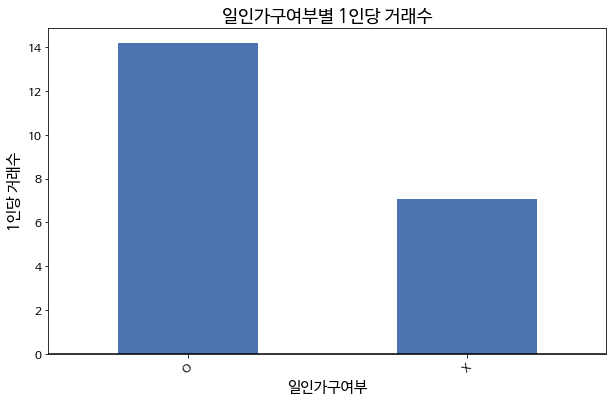

In [41]:
# 일인가구여부별 인당거래수
bar_graph(인당_거래수, '일인가구여부별 1인당 거래수', '일인가구여부', '1인당 거래수')

### 2) 업종 집중 분석

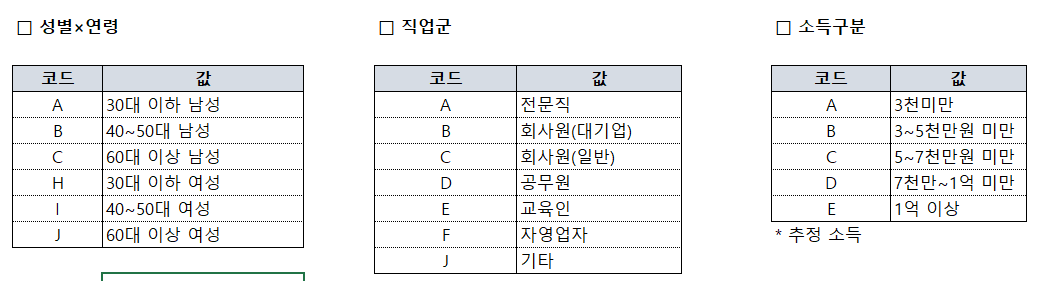

* 업종   
: '여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통업', '기타'

In [42]:
# 연령성별 업종 거래비율 구하기
전체거래수 = data[['연령성별', '업종_거래수_총합']].groupby('연령성별').sum()
업종별거래수 = data[['연령성별', '여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통업', '기타',]].groupby('연령성별').sum()

업종비율 = round((업종별거래수.T/전체거래수['업종_거래수_총합'].T * 100),2).T.sort_values(by='소비(내부)', ascending=False)
업종비율

,여가생활,소비(외부),소비(내부),패션 및 뷰티,건강,식품,교육,교통업,기타
연령성별,,,,,,,,,
D,0.98,19.11,31.54,4.64,4.85,18.84,0.15,14.94,4.94
E,0.92,25.20,24.66,4.88,8.42,16.96,0.41,10.85,7.70
A,2.48,27.60,23.27,2.60,3.66,19.97,0.05,15.51,4.85
B,1.55,28.47,15.37,2.57,7.35,20.59,0.28,16.35,7.47
F,0.50,35.20,12.50,5.43,15.68,13.60,0.02,10.35,6.72
C,0.94,31.75,6.80,1.63,16.17,18.22,0.01,17.62,6.86


* 연령성별별 업종 거래비율

  * 60대(C,F)는 소비(내부)(온라인, 배달)업종 거래비율이 적고, 30대 이하(A, D)는 소비(내부)업종 거래비율이 큼.
  * 60대(C,F)는 건강 업종에 거래비율이 크고, 30대 이하(A, D)는 건강 업종 거래비율이 적음.

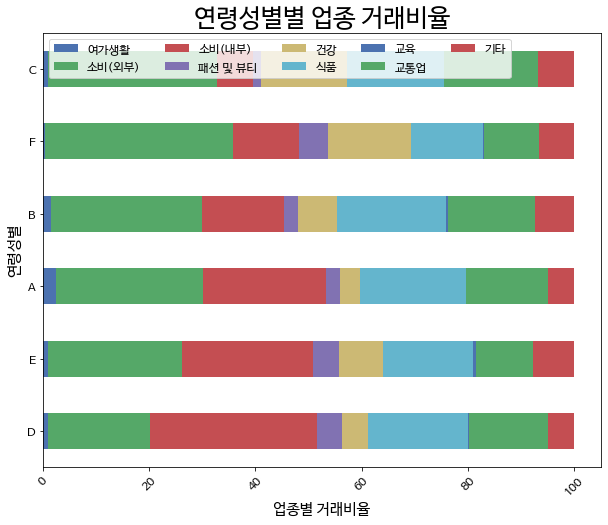

In [43]:
# 연령성별별 업종 거래비율
barh_graph(업종비율, '연령성별별 업종 거래비율', '업종별 거래비율', '연령성별')

* 직업별 업종 거래 비율은 비슷한 분포. 유의미한 차이는 보이지 않음.

In [44]:
# 직업별 업종 거래 비율
업종별거래수 = data[['직업', '여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통업', '기타']].groupby('직업').sum()
전체거래수 = data[['직업', '업종_거래수_총합']].groupby('직업').sum()

업종비율 = round((업종별거래수.T/전체거래수['업종_거래수_총합'].T * 100),2).T.sort_values(by='소비(내부)', ascending=False)
업종비율

,여가생활,소비(외부),소비(내부),패션 및 뷰티,건강,식품,교육,교통업,기타
직업,,,,,,,,,
E.교육인,0.50,23.77,27.90,3.07,6.87,20.18,0.15,12.43,5.14
B.회사원(대기업),1.29,22.13,24.06,3.39,5.04,21.31,0.17,17.62,4.99
A.전문직,1.46,20.05,22.88,5.33,4.03,25.07,0.40,14.32,6.46
C.회사원(일반),1.74,25.79,21.77,3.67,6.48,19.06,0.21,15.02,6.26
D.공무원,0.62,27.28,21.10,1.83,8.07,21.01,0.13,14.29,5.67
J.기타,1.02,28.70,20.38,4.27,10.19,16.75,0.28,11.33,7.09
F.자영업자,1.05,28.75,19.78,2.58,7.24,18.28,0.16,14.28,7.88


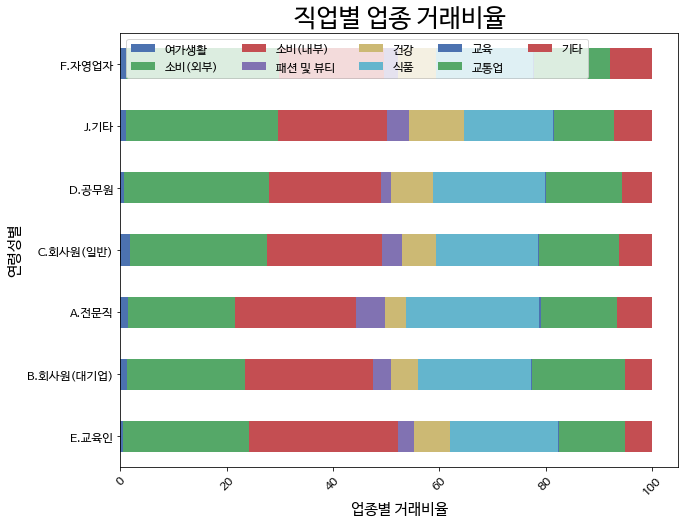

In [45]:
# 직업별 업종 거래 비율
barh_graph(업종비율, '직업별 업종 거래비율', '업종별 거래비율', '연령성별')

* 추정소득 별 업종 거래 비율
* 추정소득이 높은 집단일수록 소비(외부)+소비(내부) 거래가 차지하는 비율이 적고, 미세하지만 교육 업종이 차지하는 비율이 큼.

In [46]:
# 추정소득 별 업종 거래 비율
업종별거래수 = data[['추정소득', '여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통업', '기타']].groupby('추정소득').sum()
전체거래수 = data[['추정소득', '업종_거래수_총합']].groupby('추정소득').sum()

업종비율 = round((업종별거래수.T/전체거래수['업종_거래수_총합'].T * 100),2).T
업종비율

,여가생활,소비(외부),소비(내부),패션 및 뷰티,건강,식품,교육,교통업,기타
추정소득,,,,,,,,,
A,1.77,28.17,22.01,3.40,7.80,17.47,0.07,13.82,5.48
B,1.34,26.83,21.60,3.68,7.38,18.21,0.24,13.95,6.78
C,1.17,24.37,21.43,3.52,6.75,20.35,0.28,15.33,6.79
D,1.32,23.38,20.29,3.42,6.50,22.31,0.28,16.06,6.44
E,1.77,20.88,19.81,4.38,5.73,24.76,0.38,16.01,6.28


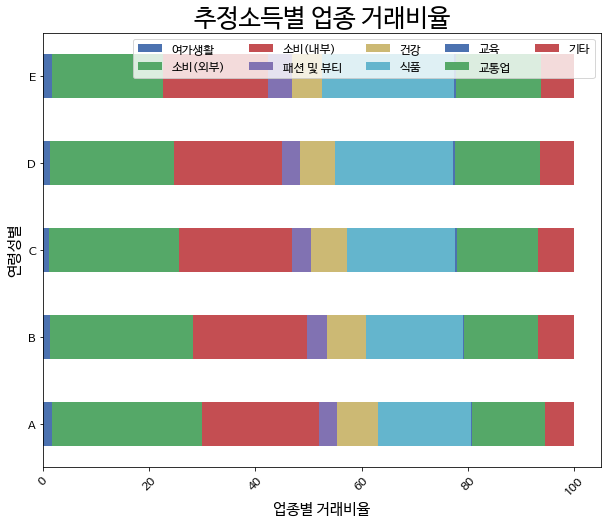

In [47]:
# 추정소득별 업종 거래 비율
barh_graph(업종비율, '추정소득별 업종 거래비율', '업종별 거래비율', '연령성별')

* 일인가구여부별 업종 거래 비율
  * 1인가구의 소비(내부) + 소비(외부) 거래가 차지하는 비율이 더 큼.
  * 미세하지만, 1인가구의 여가생활 거래가 차지하는 비율이 비교적 큼.

In [48]:
# 일인가구여부별 업종 거래 비율

업종별거래수 = data[['일인가구여부', '여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통업', '기타']].groupby('일인가구여부').sum()
전체거래수 = data[['일인가구여부', '업종_거래수_총합']].groupby('일인가구여부').sum()

업종비율 = round((업종별거래수.T/전체거래수['업종_거래수_총합'].T * 100),2).T
업종비율

,여가생활,소비(외부),소비(내부),패션 및 뷰티,건강,식품,교육,교통업,기타
일인가구여부,,,,,,,,,
O,1.90,27.92,23.26,2.89,5.98,18.38,0.07,14.02,5.59
X,1.24,25.86,20.93,3.86,7.74,18.91,0.27,14.39,6.80


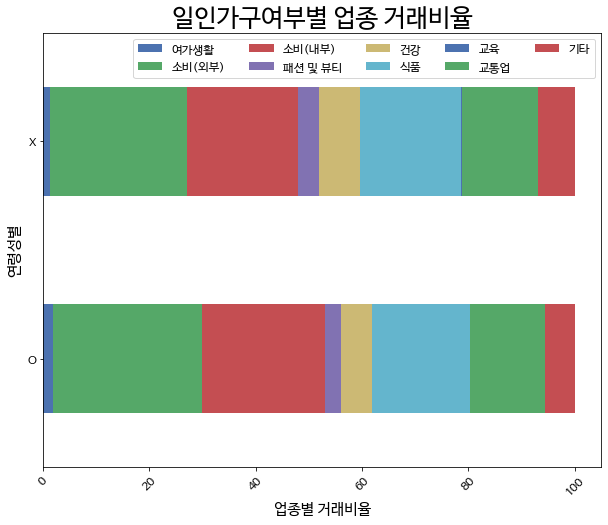

In [49]:
# 일인가구여부별 업종 거래 비율
barh_graph(업종비율, '일인가구여부별 업종 거래비율', '업종별 거래비율', '연령성별')

### 3) 코로나 발생 전후 비교

* 전년동월대비 비교를 위해 코로나 전(2019년 12월, 2020년 1월)과 1년 후 2020년 12월, 2021년 1월 데이터를 생성.

In [50]:
# 코로나 전후 데이터 나누기

# 코로나 전 데이터(201912-202001)
data1 = data[(data['year'] == '2019') & (data['month'] == '12')]
data2 = data[(data['year'] == '2020') & (data['month'] == '01')]

# 코로나 후 데이터(202012-202101)
data3 = data[(data['year'] == '2020') & (data['month'] == '12')]
data4 = data[(data['year'] == '2021') & (data['month'] == '01')]

# 코로나 전후 각각 데이터 합치기
no_covid = pd.concat([data1, data2])
covid = pd.concat([data3, data4])

In [51]:
print(len(no_covid))
print(len(covid))

41067
42668


#### 전체 거래수 비교

* 거래 전체 건수(CNT) 비교    
  : 104,695,893건에서 88,249,097건으로 약 15.7% 감소

In [52]:
# 코로나 전후 거래 전체 건수 비교(CNT) 
print(no_covid['CNT'].sum())
print(covid['CNT'].sum())

# 감소율 파악 -> 코로나 후 전체거래 수 감소
print(round((no_covid['CNT'].sum() - covid['CNT'].sum()) / no_covid['CNT'].sum() * 100, 2))

104695893
88249097
15.71


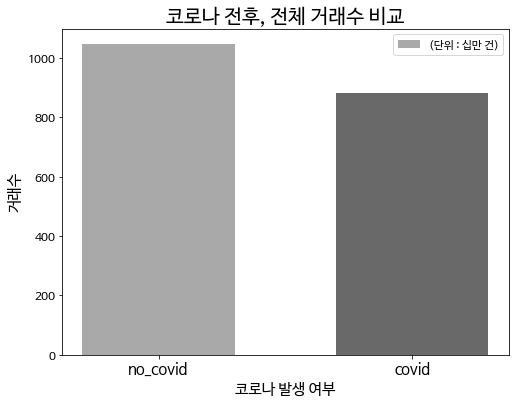

In [53]:
# 코로나 전후, 전체 거래수 비교
xs=['no_covid', 'covid']
ys=[int(no_covid['CNT'].sum() / 100000) , int(covid['CNT'].sum() / 100000)]

plt.figure(figsize=(8, 6))
plt.xlabel('코로나 발생 여부', fontsize=15) 
plt.ylabel('거래수', fontsize=15) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.bar(xs, ys, width=0.6, color=['darkgray', 'dimgrey'], label='(단위 : 십만 건)')
plt.title('코로나 전후, 전체 거래수 비교', fontsize=20)
plt.legend(fontsize=11)
plt.show()

#### 업종별 거래수 비교

* 소비(내부)를 제외한 모든 업종에서 코로나 전에 비하여 거래수 감소.    
  ※ 소비(내부): 온라인쇼핑, 배달앱

In [54]:
업종1 = no_covid[['여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통업', '기타']].sum()
업종2 = covid[['여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통업', '기타']].sum()

In [55]:
업종_시각화 = pd.concat([업종1, 업종2], axis=1)
업종_시각화.columns = ['no_covid', 'covid']
업종_시각화 = (업종_시각화 / 100000).sort_values(by='no_covid', ascending=False)
업종_시각화

,no_covid,covid
소비(외부),250.81204,237.74599
식품,206.08568,137.87341
교통업,181.45260,105.27765
소비(내부),171.70806,224.24035
건강,78.71473,59.64904
기타,62.30883,58.26211
패션 및 뷰티,44.08751,26.92400
여가생활,22.13318,6.49370
교육,3.49146,1.54261


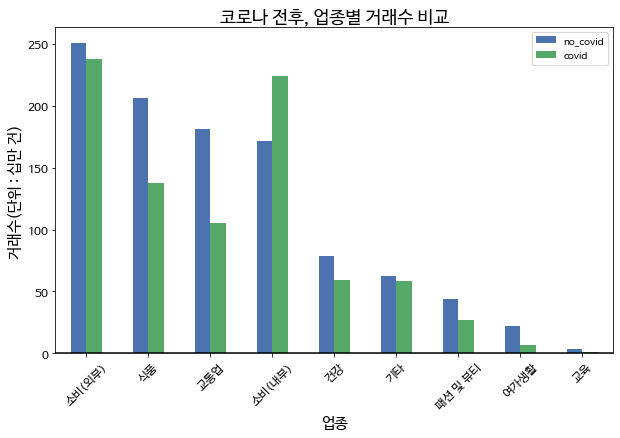

In [56]:
bar_graph(업종_시각화, '코로나 전후, 업종별 거래수 비교', '업종', '거래수(단위 : 십만 건)')

#### 업종별 거래증감률

* 여가생활 큰 폭으로 감소, 교육, 교통, 패션뷰티 -> 더 자세하게 확인.
* 유일하게 증가한 소비(내부) 자세하게 확인

In [57]:
# 업종별 거래증감률
result = reduction_ratio(업종1, 업종2)
result

소비(내부)     30.593957
소비(외부)     -5.209499
기타         -6.494617
건강        -24.221248
식품        -33.098986
패션 및 뷰티   -38.930550
교통업       -41.980633
교육        -55.817624
여가생활      -70.660791
dtype: float64

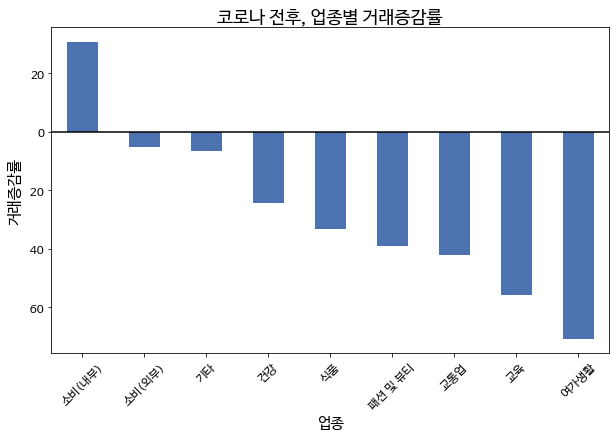

In [58]:
bar_graph(result, '코로나 전후, 업종별 거래증감률', '업종', '거래증감률')

#### 변화가 큰 업종 세부 분석

In [59]:
# 위에서 업종 열을 삭제했기 때문에 필요한 업종 데이터만 살리기

# 코로나 전 데이터(201912-202001)
data1 = detail_data[(detail_data['year'] == '2019') & (detail_data['month'] == '12')]
data2 = detail_data[(detail_data['year'] == '2020') & (detail_data['month'] == '01')]

# 코로나 후 데이터(202012-202101)
data3 = detail_data[(detail_data['year'] == '2020') & (detail_data['month'] == '12')]
data4 = detail_data[(detail_data['year'] == '2021') & (detail_data['month'] == '01')]

# 코로나 전후 각각 데이터 합치기
detail_no_covid = pd.concat([data1, data2])
detail_covid = pd.concat([data3, data4])

In [60]:
print(len(detail_no_covid))
print(len(detail_covid))

41067
42668


In [61]:
# 여가생활 세부 컬럼만 추출
업종1 = detail_no_covid[['골프장', '관람', '놀이공원', '스포츠시설', '여행상품', '유흥','취미']].sum()
업종2 = detail_covid[['골프장', '관람', '놀이공원', '스포츠시설', '여행상품', '유흥','취미']].sum()

In [62]:
result = reduction_ratio(업종1, 업종2)
result

골프장     -11.112029
여행상품    -54.864702
취미      -58.982528
스포츠시설   -85.374579
놀이공원    -92.971335
유흥      -94.985285
관람      -95.629199
dtype: float64

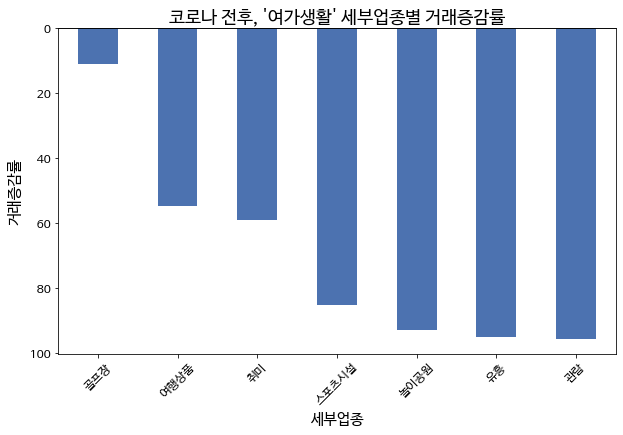

In [63]:
bar_graph(result, "코로나 전후, '여가생활' 세부업종별 거래증감률", '세부업종', '거래증감률')

* 여가생활 업종 뜯어보니 관람, 유흥, 놀이공원, 스포츠시설 크게 감소(95.6 ~ 85.3%)

In [64]:
# 교육 세부 컬럼만 추출
업종1 = detail_no_covid[['교육기타', '학교', '학원', '유아교육']].sum()
업종2 = detail_covid[['교육기타', '학교', '학원', '유아교육']].sum()

# 세부업종 거래증감률
result = reduction_ratio(업종1, 업종2)
result


학원     -50.710667
교육기타   -51.382641
학교     -78.627874
유아교육   -99.763890
dtype: float64

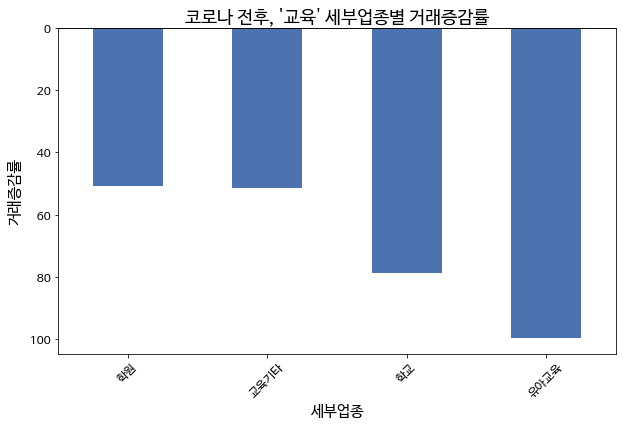

In [65]:
bar_graph(result, "코로나 전후, '교육' 세부업종별 거래증감률", '세부업종', '거래증감률')

* 교육 : 유아교육, 학교, 학원 등 운영 규제로 인한 감소로 보임.

In [66]:
# 교통 세부 컬럼만 추출
업종1 = detail_no_covid[['주유', '주차', '차량관리', '차량구매', '교통',  '대중교통']].sum()
업종2 = detail_covid[['주유', '주차', '차량관리', '차량구매', '교통',  '대중교통']].sum()

# 세부업종 거래증감률
result = reduction_ratio(업종1, 업종2)
result

차량구매    66.446826
차량관리     5.057823
주유     -10.706224
주차     -31.675502
대중교통   -50.872349
교통     -57.160599
dtype: float64

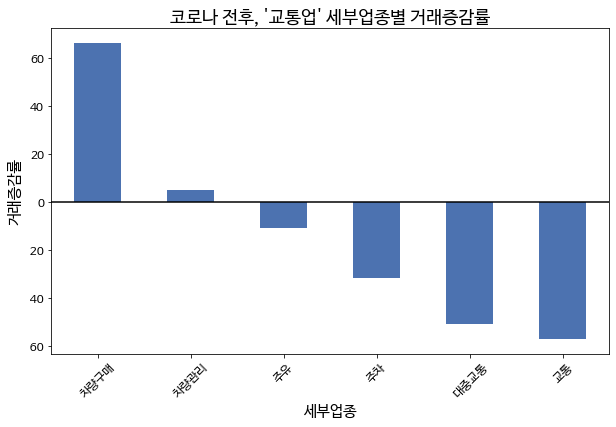

In [67]:
bar_graph(result, "코로나 전후, '교통업' 세부업종별 거래증감률", '세부업종', '거래증감률')

* 교통 : 교통, 대중교통 등은 거래수가 줄고, 차량구매 업종은 거래수가 늘었음 -> 코로나로 인해 대중교통 이용을 자제하고 자가용 구매가 늘었다고 볼 수 있음(차박 유행).

In [68]:
# 패션 및 뷰티 세부 컬럼만 추출
업종1 = detail_no_covid[['면세점', '백화점', '쇼핑기타', '스포츠의류용품', '아울렛',  '패션잡화',  '화장품',  '뷰티',  '의류']].sum()
업종2 = detail_covid[['면세점', '백화점', '쇼핑기타', '스포츠의류용품', '아울렛',  '패션잡화',  '화장품',  '뷰티',  '의류']].sum()

# 세부업종 거래증감률
result = reduction_ratio(업종1, 업종2)
result

뷰티        -24.717575
쇼핑기타      -29.096670
백화점       -33.175657
화장품       -39.644969
패션잡화      -40.276066
아울렛       -42.491649
의류        -46.339779
스포츠의류용품   -47.528891
면세점       -95.279128
dtype: float64

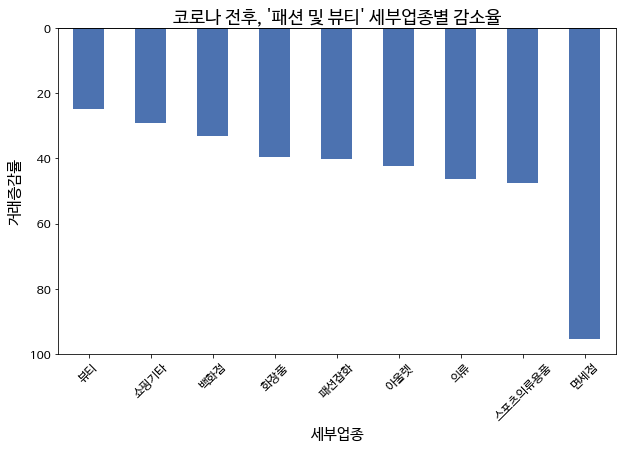

In [69]:
bar_graph(result, "코로나 전후, '패션 및 뷰티' 세부업종별 감소율", '세부업종', '거래증감률')

* 패션 및 뷰티
  * 해외여행을 거의 할 수 없는 상황 -> 면세점 95% 감소.
  * 그외 의류, 화장품 등 모두 감소.

In [70]:
# 소비(내부) 세부 컬럼만 추출
업종1 = detail_no_covid[['온라인쇼핑', '배달앱']].sum()
업종2 = detail_covid[['온라인쇼핑', '배달앱']].sum()

# 세부업종 거래증감률
result = reduction_ratio(업종1, 업종2)
result

배달앱      98.592496
온라인쇼핑    22.075728
dtype: float64

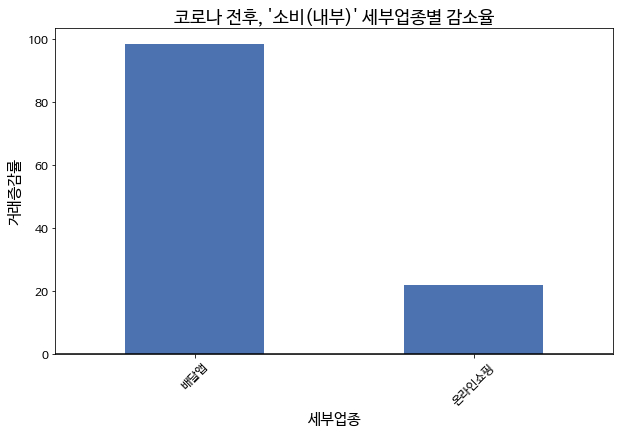

In [71]:
bar_graph(result, "코로나 전후, '소비(내부)' 세부업종별 감소율", '세부업종', '거래증감률')

* 소비(내부)
  * 유일하게 증가한 업종. 온라인쇼핑, 배달앱이 해당.
  * 배달앱 업종 거래율이 크게 증가함.

### 4) 코로나 발생 단기, 장기 비교

* 위에서는 코로나 발생 전, 후를 살펴봤다면, 아래는 단기, 장기로 나누어 살펴보겠음.
  * 단기: 우리나라 코로나 발생 직후 4개월 (2020년 2월 ~ 2020년 5월)
  * 장기: 1년 후인 2021년 2월 ~ 2021년 5월

In [72]:
# 비교를 위한 데이터 생성

# 2020.02 - 2020.05
data1 = data[(data['year'] == '2020') & (data['month'] == '02')]
data2 = data[(data['year'] == '2020') & (data['month'] == '03')]
data3 = data[(data['year'] == '2020') & (data['month'] == '04')]
data4 = data[(data['year'] == '2020') & (data['month'] == '05')]

# 2021.02 - 2021.05
data5 = data[(data['year'] == '2021') & (data['month'] == '02')]
data6 = data[(data['year'] == '2021') & (data['month'] == '03')]
data7 = data[(data['year'] == '2021') & (data['month'] == '04')]
data8 = data[(data['year'] == '2021') & (data['month'] == '05')]

# 각각 데이터 합치기
spring_20 = pd.concat([data1, data2, data3, data4]) # 단기
spring_21 = pd.concat([data5, data6, data7, data8]) # 장기

##### 전체 거래수 비교

In [73]:
# 전체 건수 비교
print(spring_20['CNT'].sum())
print(spring_21['CNT'].sum())

# 증감율 파악
print(round((spring_21['CNT'].sum() - spring_20['CNT'].sum()) / spring_20['CNT'].sum() * 100, 2))

172973004
190687309
10.24


*   코로나 발생 기간 단기에 비해 전체 건수가 10퍼센트 정도 증가했음
*   전체 거래수 증가 이유 추측(아래 사진 참고)
  

 1.   단기(20.02-05) 기간에 첫 집합금지명령, 생활 속 거리두기 시행
  *    20년도 4월8일~19일 서울 유흥업소 첫 집합금지명령
  *    이전에도 감염 위험이 높은 시설의 운영 자제를 강력 권고함
  *    20.05.06. ~ 20.06.27. 생활 속 거리두기 시행


 2.   장기(21.02-05) 기간에 지원금 지급
  *    3월29일부터 소상공인 4차 재난지원금 지급
  *    그 외에도 21년도 3~5월 간 지원금 지급이 있었음














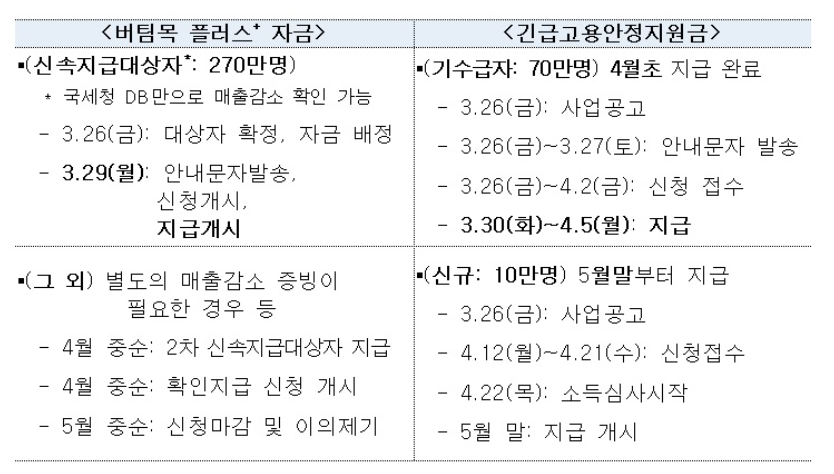

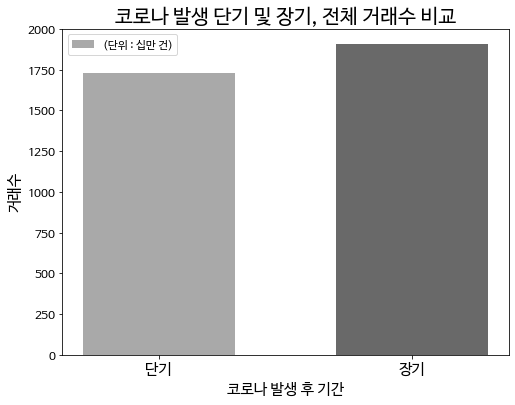

In [74]:
# 전체 거래수 비교

xs=['단기', '장기']
ys=[int(spring_20['CNT'].sum() / 100000) , int(spring_21['CNT'].sum() / 100000)]

plt.figure(figsize=(8, 6))
plt.xlabel('코로나 발생 후 기간', fontsize=15) 
plt.ylabel('거래수', fontsize=15) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.bar(xs, ys, width=0.6, color=['darkgray', 'dimgrey'], label='(단위 : 십만 건)')
plt.title('코로나 발생 단기 및 장기, 전체 거래수 비교', fontsize=20)
plt.legend(fontsize=11)
plt.show()

#### 업종별 거래수 비교

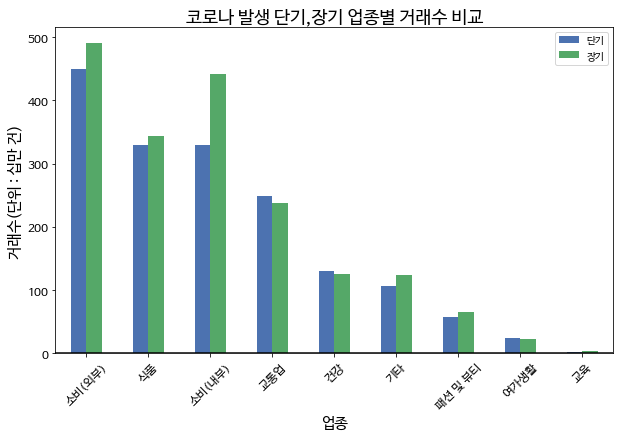

In [75]:
업종1 = spring_20[['여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통업', '기타']].sum()
업종2 = spring_21[['여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통업', '기타']].sum()

업종_시각화 = pd.concat([업종1, 업종2], axis=1)
업종_시각화.columns = ['단기', '장기']
업종_시각화 = (업종_시각화 / 100000).sort_values(by='단기', ascending=False)
업종_시각화

bar_graph(업종_시각화, '코로나 발생 단기,장기 업종별 거래수 비교', '업종', '거래수(단위 : 십만 건)')

#### 업종별 거래증감률

In [76]:
업종1 = spring_20[['여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통업', '기타']].sum()
업종2 = spring_21[['여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통업', '기타']].sum()

# 업종별 거래증감률
result = reduction_ratio(업종1, 업종2)
result

소비(내부)     34.120588
교육         22.808129
기타         15.859046
패션 및 뷰티    13.821737
소비(외부)      9.205280
식품          4.226742
건강         -2.896170
교통업        -4.627529
여가생활       -8.699551
dtype: float64

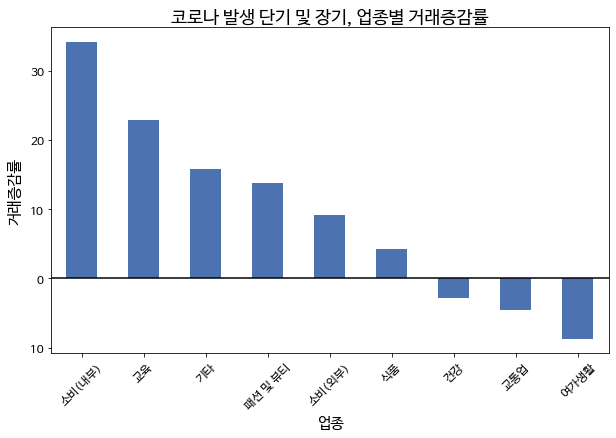

In [77]:
bar_graph(result, '코로나 발생 단기 및 장기, 업종별 거래증감률', '업종', '거래증감률')



*   건강, 교통업, 여가생활 업종 거래율은 소폭 감소한 반면, 그 외 업종 거래율은 모두 증가함
*   그 중 소비(내부), 교육, 패션 및 뷰티 업종 거래율이 10% 이상 증가함


*   각 업종의 세부업종을 확인하고, 세부업종 증감률을 파악할 필요 있음
   *   코로나 지속 기간이 어떤 업종에 어떤 영향을 미쳤는지 파악 가능함








#### 변화가 큰 업종 세부 분석



In [78]:
# 비교를 위한 데이터 생성

# 2020.02 - 2020.05
data1 = detail_data[(detail_data['year'] == '2020') & (detail_data['month'] == '02')]
data2 = detail_data[(detail_data['year'] == '2020') & (detail_data['month'] == '03')]
data3 = detail_data[(detail_data['year'] == '2020') & (detail_data['month'] == '04')]
data4 = detail_data[(detail_data['year'] == '2020') & (detail_data['month'] == '05')]

# 2021.02 - 2021.05
data5 = detail_data[(detail_data['year'] == '2021') & (detail_data['month'] == '02')]
data6 = detail_data[(detail_data['year'] == '2021') & (detail_data['month'] == '03')]
data7 = detail_data[(detail_data['year'] == '2021') & (detail_data['month'] == '04')]
data8 = detail_data[(detail_data['year'] == '2021') & (detail_data['month'] == '05')]

# 각각 데이터 합치기
spring_20 = pd.concat([data1, data2, data3, data4]) # 단기
spring_21 = pd.concat([data5, data6, data7, data8]) # 장기

In [79]:
# 소비(내부) 세부 컬럼만 추출
업종1 = spring_20[['온라인쇼핑', '배달앱']].sum()
업종2 = spring_21[['온라인쇼핑', '배달앱']].sum()

# 세부업종 거래증가율
result = reduction_ratio(업종1, 업종2)
result

배달앱      108.632311
온라인쇼핑     24.920051
dtype: float64

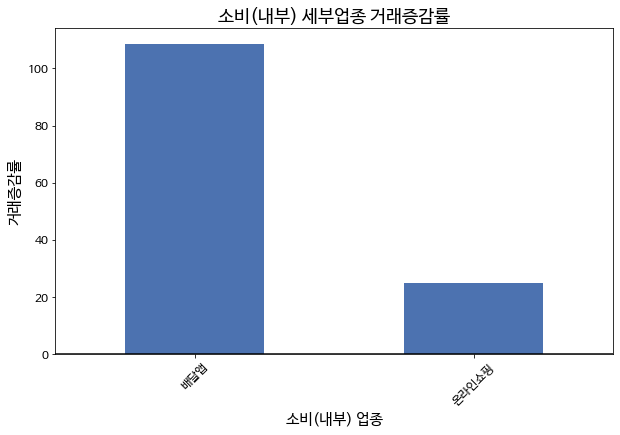

In [80]:
bar_graph(result,  '소비(내부) 세부업종 거래증감률', '소비(내부) 업종', '거래증감률')

*   소비(내부) 업종 중 '배달앱' 업종의 거래율이 크게 증가함
*   코로나 장기화로 배달앱 사용이 증가했음을 알 수 있음




In [81]:
# 교육 세부 컬럼만 추출

업종1 = spring_20[['교육기타', '학교', '학원', '유아교육']].sum()
업종2 = spring_21[['교육기타', '학교', '학원', '유아교육']].sum()

# 세부업종 거래증감률
result = reduction_ratio(업종1, 업종2)
result

유아교육    395.710456
학원       28.446701
교육기타      9.687666
학교      -21.384529
dtype: float64

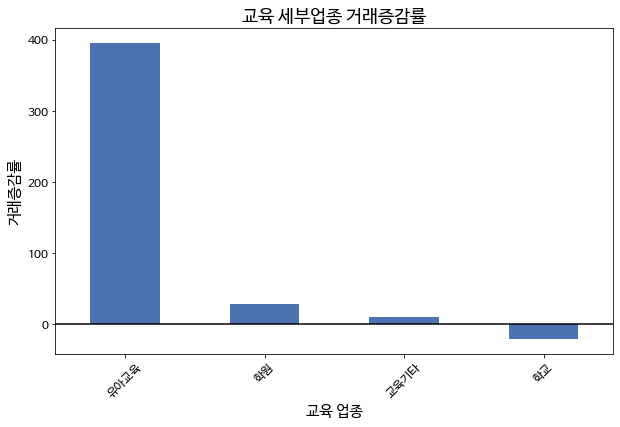

In [82]:
bar_graph(result,  '교육 세부업종 거래증감률', '교육 업종', '거래증감률')

*   교육의 세부업종 중 유아교육 업종 거래율이 크게 증가함(약 4배) 
*   코로나 발생 직후(단기)에 비해 유치원, 어린이집 등 유아교육 관련 기관이 비교적 정상운영 됐음을 알 수 있음



In [83]:
# 패션 및 뷰티 세부 컬럼만 추출
업종1 = spring_20[['면세점', '백화점', '쇼핑기타', '스포츠의류용품', '아울렛',  '패션잡화',  '화장품',  '뷰티',  '의류']].sum()
업종2 = spring_21[['면세점', '백화점', '쇼핑기타', '스포츠의류용품', '아울렛',  '패션잡화',  '화장품',  '뷰티',  '의류']].sum()

# 세부업종 거래증감률
result = reduction_ratio(업종1, 업종2)
result

아울렛        25.635185
면세점        25.577028
백화점        24.419204
패션잡화       10.120742
뷰티         10.093258
쇼핑기타        4.169270
의류          0.448505
스포츠의류용품    -3.738805
화장품        -4.687308
dtype: float64

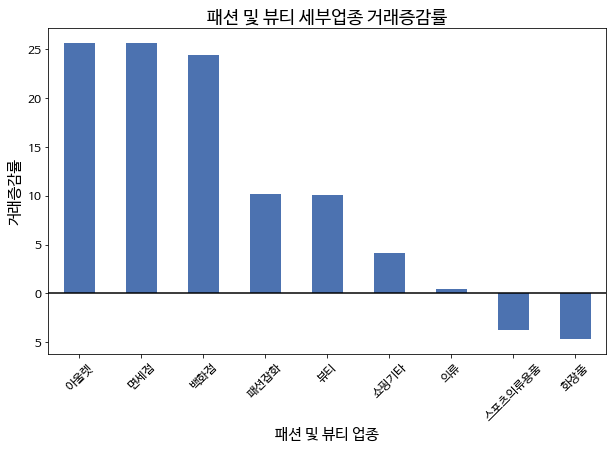

In [84]:
bar_graph(result,  '패션 및 뷰티 세부업종 거래증감률', '패션 및 뷰티 업종', '거래증감률')

*   스포츠의류용품, 화장품을 제외한 모든 세부업종에서 거래율이 증가함

*   그 중 패션 및 뷰티 세부업종 중 아울렛, 면세점, 백화점 업종 거래율이 가장 크게 증가함
  *   코로나 발생 직후에 비해 쇼핑 횟수가 늘어난 것을 알 수 있음


  *   코로나 유행 초기 얼어붙었던 소비 심리가 장기화에 따라 풀어진 것으로 보임.





## 종합 및 결론

1. 코로나19 발생 전, 후 비교
  - 소비 심리 위축: 거래 전체 건수(CNT) 약 15.7% 감소
  - 여가생활 큰 폭으로 감소(관람, 유흥, 놀이공원, 스포츠시설, 취미 등)
  - 업종 중 온라인쇼핑, 배달앱 등 집콕 소비만 유일하게 증가. 특히 배달업 업종 거래 비율이 크게 증가함.

2. 코로나19 발생 단기, 장기 비교
  - 단기에 비해 장기 거래 전체 건수 약 10% 증가

  - 그 중 소비(내부), 교육, 패션 및 뷰티 업종 거래율이 단기에 비해 10%이상 증가
  - 소비(내부) : 배달앱 거래율 크게 증가 -> 익히 알고있는 배달앱의 성장
  - 교육: 유아교육 크게 증가.
  - 패션 및 뷰티: 아울렛, 면세점, 백화점, 패션잡화, 뷰티 등 증가. 보복소비?

3. 결론    
  - 재난지원금 지급 기간에 소비 증가. 소비 증진에 도움이 되었음.
  - 주 소비처가 집안으로 이동한 홈이코노미 트렌드. 관련 서비스 지속적인 성장 예측.
  - 더불어 비대면 상품과 사업모델도 함께 성장 예측.
  - 코로나 발생 전보다 후에 소비 감소가 있었는데, 오히려 장기화 되면서 소비가 증가하는 모습을 보였음. 최근 백신접종, 치료제 개발 등을 고려했을 때 이후 소비 또한 증가할 가능성이 있음.
